In [2]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
data=pd.read_csv("spinal.csv")
data.head()

,alpha_ec_0,alpha_ec_1,alpha_ec_2,alpha_ec_3,alpha_ec_4,alpha_ec_5,alpha_ec_6,alpha_ec_7,alpha_ec_8,alpha_ec_9,...,ratio_theta_39,ratio_theta_40,ratio_theta_41,ratio_theta_42,ratio_theta_43,ratio_theta_44,ratio_theta_45,ratio_theta_46,ratio_theta_47,labels
0,0.11184,0.12387,0.12858,0.11324,0.10571,0.10690,0.10756,0.11064,0.10875,0.15893,...,0.73870,0.58709,0.55198,0.54811,0.57869,0.59345,0.60436,0.56294,1.01440,0
1,0.29834,0.26881,0.26239,0.38009,0.34358,0.28500,0.24791,0.25033,0.26047,0.26016,...,0.32788,0.43164,0.49603,0.40680,0.31283,0.66352,0.58386,0.46658,0.74867,0
2,0.36912,0.39587,0.38999,0.25772,0.40554,0.44199,0.44004,0.39947,0.31546,0.28348,...,0.86506,1.09310,0.31759,0.36353,0.50553,0.33478,0.49383,0.62363,0.61417,0
3,0.76120,0.77726,0.77042,0.60161,0.70183,0.72725,0.76245,0.78904,0.72984,0.52236,...,0.25090,0.43196,0.71301,0.53340,0.28528,0.68135,0.66315,0.25250,0.85448,0
4,0.16770,0.15146,0.14714,0.15728,0.14965,0.14154,0.13228,0.12760,0.14351,0.17252,...,1.73190,1.24420,2.76220,3.00930,2.43520,2.53070,2.58470,2.00770,2.29460,0


In [4]:

label_encoder = LabelEncoder()
data['labels'] = label_encoder.fit_transform(data['labels'])


In [5]:
from sklearn.feature_selection import chi2
X = data.drop('labels',axis=1)
y = data['labels']

In [6]:
chi_scores = chi2(X,y)
chi_scores

(array([1.32070958e+00, 1.13336376e+00, 1.05355051e+00, 1.27249612e+00,
        1.37989594e+00, 1.19382711e+00, 9.71036007e-01, 8.85182772e-01,
        6.25697819e-01, 9.07051252e-01, 1.22689239e+00, 8.39468452e-01,
        7.04457291e-01, 4.87414766e-01, 3.91238073e-01, 7.10227381e-01,
        1.40577071e+00, 2.09308820e+00, 4.82374040e-01, 2.42759080e-01,
        1.90552648e-01, 7.28288614e-02, 4.52987376e-01, 1.60440852e+00,
        3.41347712e-01, 2.28013870e+00, 1.41645511e+00, 3.74176592e-01,
        1.18175239e-01, 5.32656354e-01, 1.75783162e+00, 1.66698169e+00,
        6.56980592e-01, 1.34663258e+00, 1.70887706e+00, 1.75946942e+00,
        1.19221413e+00, 1.62206576e+00, 1.41605240e+00, 1.45863896e+00,
        2.64859373e-01, 8.55301513e-01, 7.53981079e-01, 9.42763001e-01,
        1.82379825e-01, 1.82838885e-02, 4.22073298e-01, 1.35409244e+00,
        2.28833509e-01, 1.81264777e-01, 1.72782250e-01, 1.62012012e-01,
        7.88948296e-01, 1.04731541e+00, 7.96348937e-01, 5.953752

In [7]:
#import matplotlib.pyplot as plt
p_values = pd.Series(chi_scores[1])
#p_values.sort_values(ascending = False , inplace = True)

<AxesSubplot:>

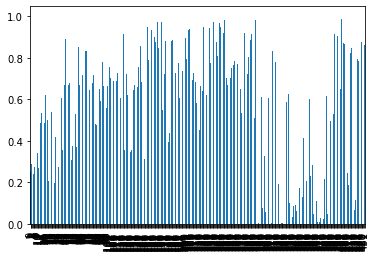

In [8]:
#scale_factor=50
#ymin,ymax=plot.ylim()
#plot.ylim(ymin*scale_factor,ymax*scale_factor)
p_values.plot.bar()


In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=25)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(chi_feature), 'selected features')

['alpha_ec_17', 'alpha_ec_23', 'alpha_ec_25', 'alpha_ec_34', 'beta_ec_5', 'theta_ec_25', 'theta_ec_33', 'theta_ec_34', 'ratio_alpha_3', 'ratio_alpha_26', 'ratio_alpha_34', 'ratio_beta_0', 'ratio_beta_2', 'ratio_beta_4', 'ratio_beta_13', 'ratio_beta_21', 'ratio_beta_26', 'ratio_beta_29', 'ratio_beta_33', 'ratio_beta_34', 'ratio_beta_35', 'ratio_beta_36', 'ratio_beta_37', 'ratio_beta_41', 'ratio_beta_47'] selected features


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline


model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('c',chi_selector),('m',model)])

In [11]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
#from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


Accuracy: 0.698 (0.100)


In [12]:
#for 25 features accuracy is 0.713

In [19]:
p= X.loc[:,chi_support].columns.tolist()
#p.to_csv("chi.csv")
p

['alpha_ec_17',
 'alpha_ec_23',
 'alpha_ec_25',
 'alpha_ec_34',
 'beta_ec_5',
 'theta_ec_25',
 'theta_ec_33',
 'theta_ec_34',
 'ratio_alpha_3',
 'ratio_alpha_26',
 'ratio_alpha_34',
 'ratio_beta_0',
 'ratio_beta_2',
 'ratio_beta_4',
 'ratio_beta_13',
 'ratio_beta_21',
 'ratio_beta_26',
 'ratio_beta_29',
 'ratio_beta_33',
 'ratio_beta_34',
 'ratio_beta_35',
 'ratio_beta_36',
 'ratio_beta_37',
 'ratio_beta_41',
 'ratio_beta_47']